In [2]:
# Melakukan import library
import cv2 
import matplotlib.pyplot as plt
import numpy as np
import math

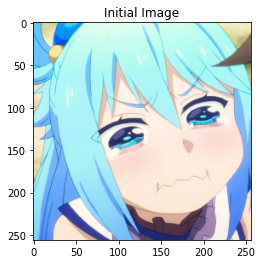

In [3]:
# Melakukan import citra
gbr = cv2.imread("aque.png")
rgb = cv2.cvtColor(gbr, cv2.COLOR_BGR2RGB)
plt.title("Initial Image")
plt.imshow(rgb)
# print(rgb)

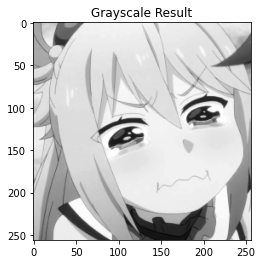

In [4]:
# Mengubah ke Grayscale
mcitra = cv2.cvtColor(rgb, cv2.COLOR_RGB2GRAY)
plt.title("Grayscale Result")
plt.imshow(mcitra, "gray")

In [5]:
# Membuat zero padding
padding = np.pad(mcitra,[1],'constant')
print(padding[0:len(mcitra)+2,0:len(mcitra[0])+2])

[[  0   0   0 ...   0   0   0]
 [  0 176 176 ... 234 234   0]
 [  0 176 176 ... 234 234   0]
 ...
 [  0 187 187 ... 228 228   0]
 [  0 187 186 ... 227 227   0]
 [  0   0   0 ...   0   0   0]]


# Operator Sobel

In [5]:
# Mendifinisikan Kernel 
sx  = np.array([[-1,0,1],
                [-2,0,2],
                [-1,0,1]])

sy  = np.array([[1,2,1],
                [0,0,0],
                [-1,-2,-1]])

print("Sx:\n", sx,
      "\n\n Sy:\n", sy)

Sx:
 [[-1  0  1]
 [-2  0  2]
 [-1  0  1]] 

 Sy:
 [[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


In [6]:
# Membuat fungsi Operator Sobel
def Sobel (mcitra, padding, sx, sy):
    Gx = np.zeros([len(mcitra),len(mcitra[0])])
    Gy = np.zeros([len(mcitra),len(mcitra[0])])
    jum = np.zeros([len(mcitra),len(mcitra[0])])
    kernel = np.zeros([3,3])
    
    for hit in range(2):
        if hit==0:
            kernel=sx
        else:
            kernel=sy
        for i in range(1,len(padding)-1): 
            for j in range (1,len(padding[0])-1): 
                a = padding[i-1,j-1]*kernel [0,0] + padding[i-1,j]*kernel [0,1] + padding[i-1,j+1]*kernel [0,2]
                b = padding[i,j-1]*kernel [1,0] + padding[i,j]*kernel [1,1] + padding[i,j+1]*kernel [1,2]
                c = padding[i+1,j-1]*kernel [2,0] + padding[i+1,j]*kernel [2,1] + padding[i+1,j+1]*kernel [2,2]
                if hit==0:
                    Gx[i-1,j-1] = a+b+c
                else:
                    Gy[i-1,j-1] = a+b+c
    
    for a in range(len(mcitra)):
        for b in range (len(mcitra[0])):
            hasil=round(math.sqrt((Gx[a,b]**2)+(Gy[a,b]**2)))
            jum[a,b]=hasil

    return jum

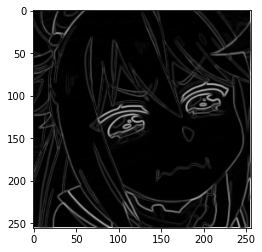

In [7]:
S = Sobel (mcitra, padding, sx, sy)
plt.imshow(S,cmap="gray")

# Operator Prewitt

In [8]:
# Mendifinisikan Kernel 
px  = np.array([[-1,0,1],
                [-1,0,1],
                [-1,0,1]])

py  = np.array([[1,1,1],
                [0,0,0],
                [-1,-1,-1]])

print("px:\n", px,
      "\n\n py:\n", py)

px:
 [[-1  0  1]
 [-1  0  1]
 [-1  0  1]] 

 py:
 [[ 1  1  1]
 [ 0  0  0]
 [-1 -1 -1]]


In [9]:
# Membuat fungsi Operator Prewitt
def Prewitt (mcitra, padding, px, py):
    Gx = np.zeros([len(mcitra),len(mcitra[0])])
    Gy = np.zeros([len(mcitra),len(mcitra[0])])
    jum = np.zeros([len(mcitra),len(mcitra[0])])
    kernel = np.zeros([3,3])
    
    for hit in range(2):
        if hit==0:
            kernel=px
        else:
            kernel=py
        for i in range(1,len(padding)-1): 
            for j in range (1,len(padding[0])-1): 
                a = padding[i-1,j-1]*kernel [0,0] + padding[i-1,j]*kernel [0,1] + padding[i-1,j+1]*kernel [0,2]
                b = padding[i,j-1]*kernel [1,0] + padding[i,j]*kernel [1,1] + padding[i,j+1]*kernel [1,2]
                c = padding[i+1,j-1]*kernel [2,0] + padding[i+1,j]*kernel [2,1] + padding[i+1,j+1]*kernel [2,2]
                if hit==0:
                    Gx[i-1,j-1] = a+b+c
                else:
                    Gy[i-1,j-1] = a+b+c
    
    for a in range(len(mcitra)):
        for b in range (len(mcitra[0])):
            hasil=round(math.sqrt((Gx[a,b]**2)+(Gy[a,b]**2)))
            jum[a,b]=hasil

    return jum

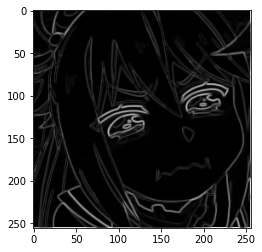

In [10]:
P = Prewitt (mcitra, padding, px, py)
plt.imshow(P,cmap="gray")

# Operator Robert

In [11]:
# Mendifinisikan Kernel
rx  = np.array([[1,0],
                [0,-1]])

ry  = np.array([[0,1],
                [-1,0]])

print("Rx:\n", rx,
      "\n\n Ry:\n", ry)

Rx:
 [[ 1  0]
 [ 0 -1]] 

 Ry:
 [[ 0  1]
 [-1  0]]


In [12]:
def Robert (mcitra, padding, rx, ry):
    Gx = np.zeros([len(mcitra),len(mcitra[0])])
    Gy = np.zeros([len(mcitra),len(mcitra[0])])
    jum = np.zeros([len(mcitra),len(mcitra[0])])
    kernel = np.zeros([3,3])
    
    for hit in range(2):
        if hit==0:
            kernel=rx
        else:
            kernel=ry
        for i in range(1,len(padding)-1): 
            for j in range (1,len(padding[0])-1): 
                a = padding[i-1,j-1]*kernel [0,0] + padding[i-1,j]*kernel [0,1] 
                b = padding[i,j-1]*kernel [1,0] + padding[i,j]*kernel [1,1]
                if hit==0:
                    Gx[i-1,j-1] = a+b
                else:
                    Gy[i-1,j-1] = a+b
    
    for a in range(len(mcitra)):
        for b in range (len(mcitra[0])):
            hasil=round(math.sqrt((Gx[a,b]**2)+(Gy[a,b]**2)))
            jum[a,b]=hasil
    
    return jum

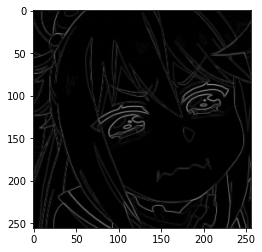

In [13]:
R = Robert (mcitra, padding, rx, ry)
plt.imshow(R,cmap="gray")

# Membandingkan Hasil

Text(0.5, 1.0, 'OPERASI ROBERT')

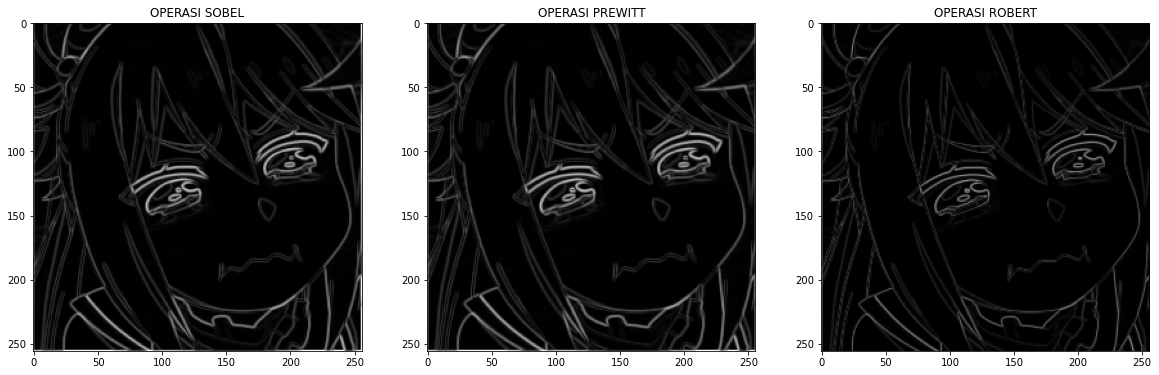

In [14]:
plt.figure(figsize=(20,20)) 
plt.subplot(1,3,1) 
plt.imshow(S,cmap="gray")
plt.title("OPERASI SOBEL")
plt.subplot(1,3,2) 
plt.imshow(P,cmap="gray")
plt.title("OPERASI PREWITT")
plt.subplot(1,3,3) 
plt.imshow(R,cmap="gray")
plt.title("OPERASI ROBERT")

# Penjelasan Perbedaan Operator

Perbedaan dari proses deteksi tepi menggunakan ketiga operator (Sobel, Prewitt, dan Robert) terletak pada kernelnya. Meskipun memiliki proses pengerjaan yang sama, perbedaan kernel ini akan menghasilkan luaran citra yang berbeda. Pada hasil Operator Sobel, tepi dapat terlihat jelas karena fungsi dari operasi ini sangat sensitif terhadap tepian diagonal daripada horizontal dan vertikal (namun tetap ada). Kemudian pada hasil Operator Prewitt, fungsi akan sangat sensitif terhadap tepi horizontal dan vertikal daripada tepi diagonalnya (namun tetap ada). Hal ini diakibatkan dari terdapatnya pengurangan pada elemen tengah matriks kernel. Yang terakhir yaitu hasil dari Operator Robert. Hasil dari operator ini kurang nampak tepian dari sisi horizontal dan vertikal karena kernel dari Operator Robert hanya menekankan pada pemeriksaan kedua arah diagonal. Meskipun demikian, objek dideteksi akan terdeteksi lebih baik pada sisi-sisi miringnya.

Metode deteksi terbaik adalah menggunakan Operator Sobel